To increse the score of the model we need the dataset that has high variance, so it will be good if we can select the features in the dataset which has variance. We can do this by ANOVA(Analysis of Variance) on the basis of f1 score.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [4]:
df= pd.read_csv('sports_activities.csv',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171
0,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,p1,a01
1,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,p1,a01
2,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,p1,a01
3,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,p1,a01
4,0.014805,0.008919,0.012728,0.007924,0.007904,0.007943,0.007268,0.007898,0.008069,0.008405,...,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,p1,a01


In [6]:
## Label encoding

In [10]:
X2 = df.iloc[:,1170:1172]
X2 = X2.apply(LabelEncoder().fit_transform)

In [11]:
df.drop([1170,1171], axis = 1, inplace = True)

In [14]:
#Merging the LabelEncoded df , X2 with actual and storing it in X_t
new_df = df.join(X2)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171
0,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0,0
1,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0,0
2,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0,0
3,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0,0
4,0.014805,0.008919,0.012728,0.007924,0.007904,0.007943,0.007268,0.007898,0.008069,0.008405,...,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0,0


In [26]:
X = new_df.iloc[:, :-1]


In [27]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170
0,0.014671,0.008831,0.012605,0.007926,0.007890,0.007933,0.007265,0.007898,0.008056,0.008472,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0
1,0.014821,0.008891,0.012470,0.007938,0.007930,0.007946,0.007272,0.007903,0.008075,0.008430,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0
2,0.014823,0.008911,0.012706,0.007943,0.007937,0.007951,0.007274,0.007905,0.008077,0.008436,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0
3,0.014680,0.008905,0.012661,0.007929,0.007932,0.007930,0.007267,0.007895,0.008066,0.008413,...,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962,0
4,0.014805,0.008919,0.012728,0.007924,0.007904,0.007943,0.007268,0.007898,0.008069,0.008405,...,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0


In [28]:
Y = new_df.iloc[:, -1]

In [29]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: 1171, dtype: int32

In [53]:
fvalue_Best = SelectKBest(f_classif, k=100)
X_kbest = fvalue_Best.fit_transform(X, Y)
print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

[[0.00859607 0.0086044  0.00790839 ... 0.00796017 0.00796014 0.00796016]
 [0.00860292 0.00861145 0.00791441 ... 0.00796647 0.00796647 0.00796647]
 [0.00860587 0.00861382 0.00791678 ... 0.00796838 0.00796837 0.00796837]
 ...
 [0.04113064 0.04121911 0.04030146 ... 0.04095093 0.04051738 0.04047373]
 [0.05327557 0.05321602 0.05275001 ... 0.05217655 0.05280152 0.05273572]
 [0.08454483 0.08433292 0.08415627 ... 0.083858   0.08399363 0.08411481]]
Original number of features: (9120, 1171)
Reduced number of features: (9120, 100)


C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [410] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [54]:
X_fea = pd.DataFrame(X_kbest)

In [55]:
X_fea.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.008596,0.008604,0.007908,0.015089,0.008994,0.008000,0.008148,0.007974,0.008099,0.008623,...,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960,0.007960
1,0.008603,0.008611,0.007914,0.015109,0.009026,0.008005,0.008064,0.007981,0.008103,0.008606,...,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966,0.007966
2,0.008606,0.008614,0.007917,0.015032,0.009028,0.007997,0.008009,0.007977,0.008099,0.008560,...,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968,0.007968
3,0.008600,0.008608,0.007912,0.015045,0.009113,0.008008,0.008050,0.007977,0.008088,0.008584,...,0.007962,0.007962,0.007962,0.007963,0.007962,0.007962,0.007962,0.007962,0.007962,0.007962
4,0.008601,0.008608,0.007913,0.015065,0.009061,0.007996,0.008009,0.007973,0.008092,0.008550,...,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963,0.007963


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_fea, Y, test_size=0.20, random_state = 451)

In [57]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [58]:
labels=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19']

In [59]:
## Plotting confusion matrix

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    figure(figsize=(10,10), dpi=80)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test,class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

training the model..
Done....!

==> training time:- 0:00:05.030000

Predicting test data
Done....!

==> testing time:- 0:00:00.044996

==> Accuracy:- 0.9451754385964912


 ********Confusion Matrix********

 [[ 91   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0  87   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 101   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0]
 [  0   0   0  88   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  98   3   0   2   0   1   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  99   0   0   3   0   0   0   0   0   0   0   0   1
    0]
 [  0   0   0   0   0   0  90   2   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   3   3   6  70   9   1   0   1   2   3   0   0   0   0
    0]
 [  0   0   0   0   3   1   0   0 103   2   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   3  72   0   0   0   0   0   

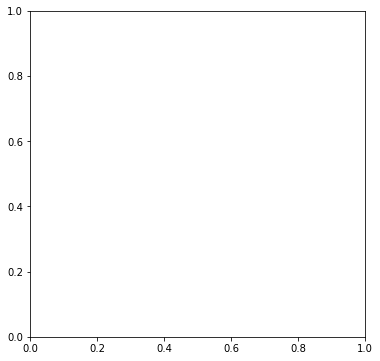

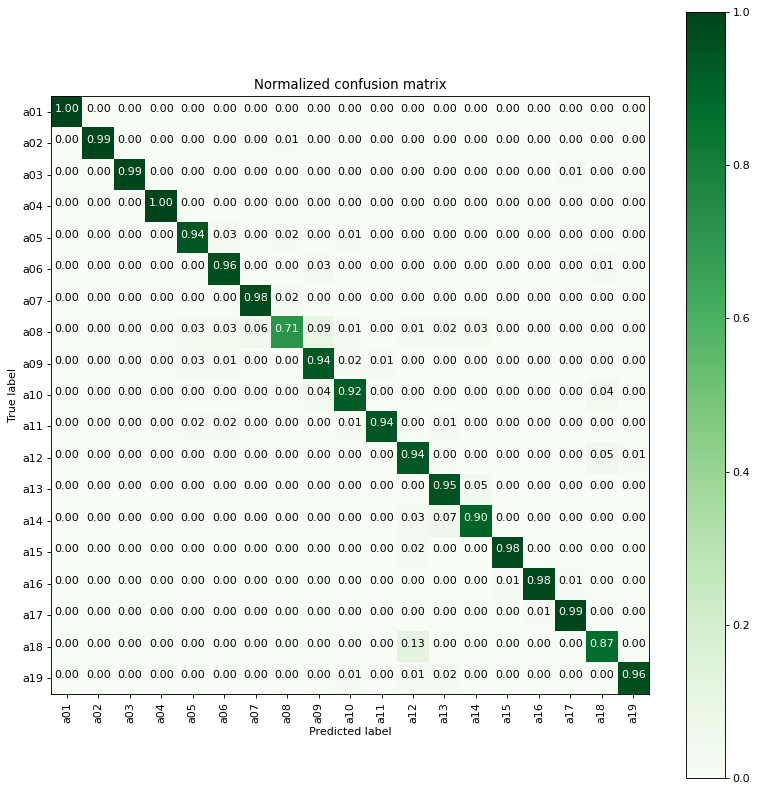

In [61]:
rfc = RandomForestClassifier()
rf_model=perform_model(rfc, X_train, y_train, X_test, y_test,class_labels=labels)
rf_model